# カルマンフィルタ

　ここでは，Julia言語を用いて，データ同化の最も基礎となるカルマンフィルタのアルゴリズムを紹介する．
線形ガウス状態空間モデル
\begin{align}
x_t &= F_t x_{t-1}+v_t \\
y_t &= H_t x_t + w_t
\end{align}
に対して，フィルタ分布$p(x_t|y_{1:t})$の平均ベクトル$x_{t|t}$と分散共分散行列$V_{t|t}$を計算する．

　システムノイズと観測ノイズは，
\begin{equation}
v_t \sim N(0,Q_t),　　w_t \sim N(0,R_t)
\end{equation}
を与える．

In [1]:
using Plots

In [2]:
#定数の設定,今回は1次元で．
F = 1.005
H = 1
Q = 0.0025
R = 1
T = 200 #←最終時刻

200

In [3]:
#ノイズを与える
v = √Q * randn(T,1)
w = √R * randn(T,1)

200×1 Array{Float64,2}:
  0.8535844314778009  
 -0.012576288111959762
  0.6367815409987206  
 -0.49363957447743273 
  1.3243698602772245  
  1.094785240348756   
  1.3851179737844361  
  0.7171466354367695  
 -1.6253248529664224  
 -0.8368298019581554  
  1.7635241575657992  
 -0.2870601673040032  
 -0.14395251196239348 
  ⋮                   
  0.408425844028349   
 -1.4358834227656125  
  0.76770953026584    
  0.08699061479184493 
  0.8395518105478493  
  0.35215417689834244 
 -0.36688266333340996 
  0.21013824137692932 
 -0.9496765204267321  
 -0.11611331539166986 
 -0.006428671345533768
 -0.9116738546942794  

　知りえない真値（疑似データ）を作成する．今回は，初期分布として$x_0 \sim N(0,5)$を考えた．

In [4]:
x = √5*randn()
sqx = [x]
for t in 1:T
    x = F*x + v[t]
    push!(sqx,x)
end

続いて観測値の計算を行う．

In [6]:
y = sqx[2] + w[1]
sqy = [y]
for t in 2:T
y = sqx[t+1] + w[t]
    push!(sqy, y)
end

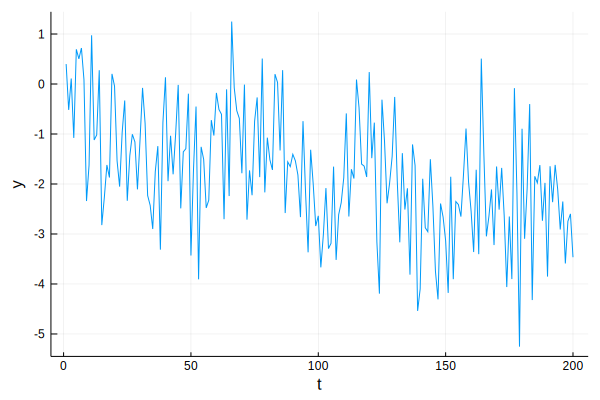

In [7]:
plot(sqy,leg=false,xlabel="t",ylabel="y")

続いて，カルマンフィルタのアルゴリズムに従って，一期先予測とフィルタリングのプログラムを組む．

式で表すと，以下のようになる．

[一期先予測]
\begin{align}
x_{t|t-1}&=F_tx_{t-1}\\
V_{t|t-1}&=F_tV_{t-1|t-1}F_t'+Q_t
\end{align}

[フィルタリング]
\begin{align}
x_{t|t}&=x_{t|t-1} +K_t(y_t-H_tx_{t|t-1})\\
V_{t|t}&=V_{t|t-1}-K_tH_tV_{t|t-1}\\
K_t&=V_{t|t-1}H_t'(H_tV_tH_t'+R_t)^{-1}
\end{align}

In [8]:
X = sqy[1] - sqy[1] + 1
sqX = [ X ]

V = sqy[1] - sqy[1] + 5
sqV = [ V ]

for t in 1:T
    X = F*X
    V = F*V*F'+ Q
    
    K = V*H'/(H*V*H'+R) #カルマゲイン
    X = X + K*(sqy[t]-H*X)
    V = V - K*H*V
    
   push!(sqX, X)
   push!(sqV, V)
end

グラフによる可視化（赤が真値，青が推定値，青と緑の幅が分散）．

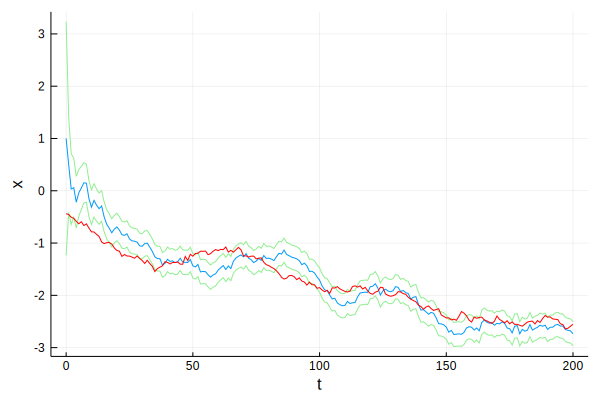

In [9]:
plot([0:T],sqX,leg=false,xlabel="t",ylabel="x")
plot!([0:T],sqX + sqV.^(1/2),linecolor=:lightgreen)
plot!([0:T],sqX- sqV.^(1/2),linecolor=:lightgreen)
plot!([0:T],sqx,leg=false,xlabel="t",ylabel="x",linecolor=:red)